<a href="https://colab.research.google.com/github/stevcas17/codigos/blob/main/cars_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cars price prediction
[Author: Elias Buitrago Bolivar](https://github.com/ebuitrago?tab=repositories)

The objective of this jupyter notebook is to train a machine learning algorithm to predict a car's price, based on known characteristics. The training data was obtained by web scraping, using Selenium and Beautiful Soap from tucarro.com.co; This project has no commercial purposes its for merely academic endeavor.
_Updated: June 22th, 2024_

## Data understanding

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Load data

In [6]:
cols = ['model','price','year','kms','color','fueltype']
data = pd.read_csv('/content/CarsFordEscape_escape_200624.csv', sep=',', names=cols, header=0, encoding='latin-1')
print(data.shape)
data.head()


(336, 6)


,model,price,year,kms,color,fueltype
0,Ford Escape 2.5 Se Hev 4x2,$125.500.000,2022,22.000,Gris,HÃ­brido
1,Ford Escape Se 4X4,$57.000.000,2013,88.400,Rojo,Gasolina
2,Ford Escape 2.0 Sel Hev,$145.000.000,2022,16.000,Gris,HÃ­brido
3,Ford Escape 2.0 Se 4x4,$50.000.000,2014,99.589,Blanco,Gasolina
4,Ford Escape Titanium 2.0 4x4,$92.000.000,2018,36.000,Rojo,Gasolina


### Verify data types

In [7]:
data.dtypes

model        object
price        object
year          int64
kms         float64
color        object
fueltype     object
dtype: object

### Count unique values for each variable

In [8]:
data.nunique()

model       110
price       194
year         16
kms         231
color         7
fueltype      4
dtype: int64

In [9]:
print(data['model'].unique().tolist())
print(data['price'].unique().tolist())
print(data['year'].unique().tolist())
print(data['kms'].unique().tolist())
print(data['color'].unique().tolist())
print(data['fueltype'].unique().tolist())

['Ford Escape 2.5 Se Hev 4x2', 'Ford Escape Se 4X4', 'Ford Escape 2.0 Sel Hev', 'Ford Escape 2.0 Se 4x4', 'Ford Escape Titanium 2.0 4x4', 'Ford Escape 2.0 Se 4x2', 'Ford Escape 2.0 TITANIUM TP 4X4', 'Ford Escape 2.0 Titanium 4x4', 'Ford Escape TITANIUM', 'Ford Escape 3.0 Xlt', 'Ford Escape  Titanium 2.5 HEV', 'Ford Escape Se', 'Ford Escape Titanium Hev ', 'Ford Escape 2.0 Titanium', 'Ford Escape 2.5 Se', 'Ford Escape 2.0 Titanium 240 hp', 'Ford Escape 2.0 SE 4x4 2014', '  Ford   Escape   Titanium Hev  2.5  4x4', 'Ford Escape 2.0 St Line 4X4 AWD', 'Ford Escape 2.5  Se Hev', 'Ford Escape 2.0 4x4', 'Ford Escape 2.0 Se 240 hp 4x2', 'Ford Escape New Titanium Hybrid', 'Ford Escape Patinum AWD Hibrida', 'Ford Escape 2.5 St-Line Fwd Ecvt Hibrida', 'Ford Escape TITANIUM HIBRIDA', 'Ford Escape 2.0', 'Ford Escape 2.5 SE AT HIBRIDA', 'Ford Escape Se 4x4 2000cc At Aa', 'Ford Escape PLATINUM', 'Ford Escape St Line 4x2 Hibrida', 'Ford Escape HÃ\xadbrida Platinum 2.5cc AT AA 4X4', 'Ford Escape  4x4 20

### Data transformation

In [10]:
# Copy data and remove model variable
datacc = data
datacc = datacc.drop(['model'], axis=1)
datacc.shape

(336, 5)

#### Transform $price$ to numerical

In [11]:
datacc['price'] = datacc['price'].str.replace(r'[$.]', '', regex=True).astype(int)

##### Transform $kms$ to numerical

In [16]:
datacc['kms'] = datacc['kms'].str.replace(r'[.]', '',regex=True).astype(int)

AttributeError: Can only use .str accessor with string values!

In [14]:
datacc.replace({'kms': {'Publicado': 0}}, inplace=True)

In [15]:
datacc['kms'] = datacc['kms'].replace('[.]','',regex=True).astype(int)

##### Transform categorical variables to dummies: $year$ and $fuel type$

In [17]:
# Object to categorical
datacc['color'] = datacc['color'].astype('category')
datacc['fueltype'] = datacc['fueltype'].astype('category')
datacc.dtypes

price          int64
year           int64
kms            int64
color       category
fueltype    category
dtype: object

In [18]:
# Convert to dummies
# Convert category to codes
datacc['color']  = pd.Categorical(datacc['color']).codes
datacc['fueltype']  = pd.Categorical(datacc['fueltype']).codes
datacc.head()

,price,year,kms,color,fueltype
0,125500000,2022,22,3,3
1,57000000,2013,88,6,1
2,145000000,2022,16,3,3
3,50000000,2014,99,1,1
4,92000000,2018,36,6,1


## Data Exploration

In [19]:
# Descriptive statistics
datacc.describe()[['price','year','kms']]

,price,year,kms
count,3.360000e+02,336.000000,336.000000
mean,9.455208e+07,2018.214286,54.809524
std,4.649962e+07,3.864330,40.345442
min,2.790000e+07,2008.000000,0.000000
25%,5.887500e+07,2015.000000,22.750000
50%,7.795000e+07,2018.000000,51.000000
75%,1.304250e+08,2022.000000,83.000000
max,2.059900e+08,2024.000000,192.000000


#### Histograms

Text(0.5, 1.0, '$kms$')

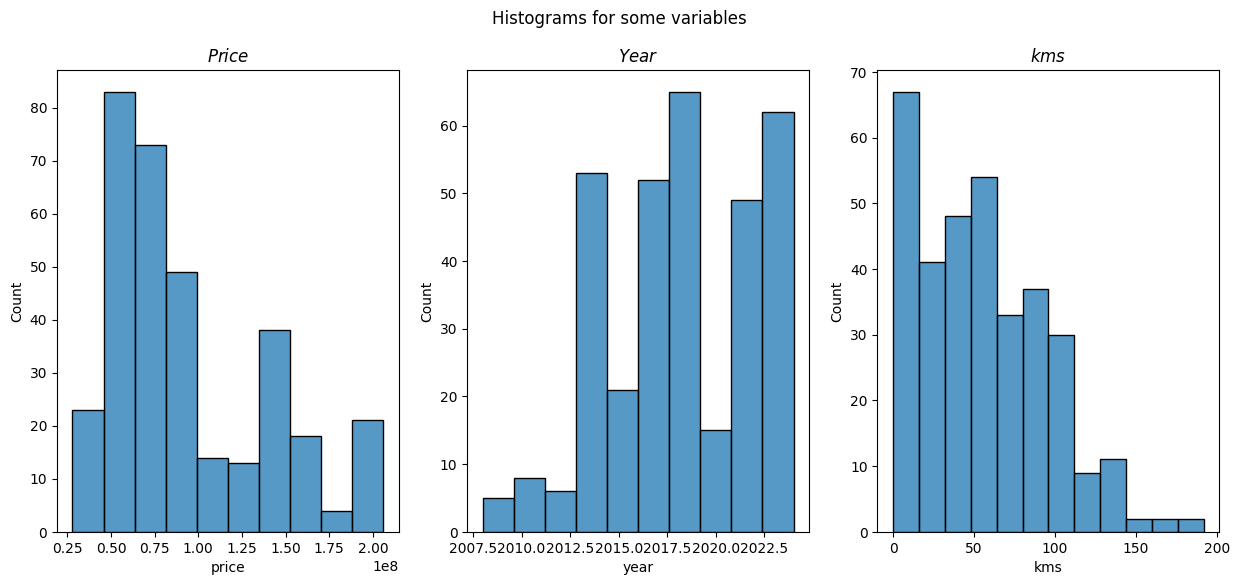

In [20]:
# Histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle('Histograms for some variables')
sns.histplot(datacc['price'], ax=ax1)
ax1.set_title('$Price$')
sns.histplot(datacc['year'], ax=ax2)
ax2.set_title('$Year$')
sns.histplot(datacc['kms'], ax=ax3)
ax3.set_title('$kms$')

#### Boxplots

<Axes: >

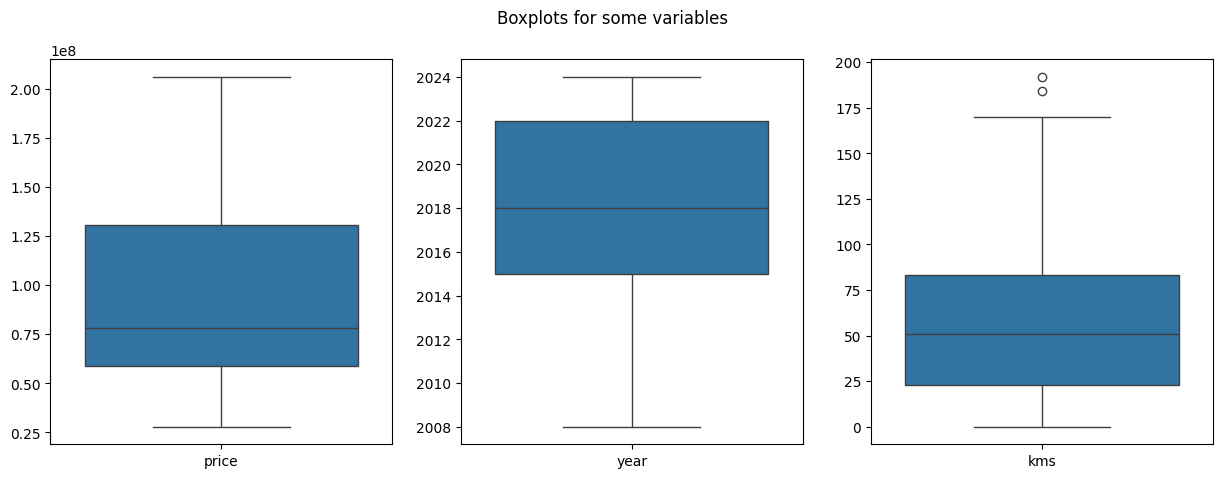

In [21]:
### Boxplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Boxplots for some variables')
sns.boxplot(data=datacc[['price']], ax=ax1)
sns.boxplot(data=datacc[['year']], ax=ax2)
sns.boxplot(data=datacc[['kms']], ax=ax3)

#### Ouliers treatment
_https://www.statology.org/remove-outliers-python/_  
_https://towardsdatascience.com/a-complete-guide-for-detecting-and-dealing-with-outliers-bad26b1e92b6_  
_https://www.scribbr.com/statistics/outliers/_  
_https://www.statology.org/remove-outliers/_  

<Axes: >

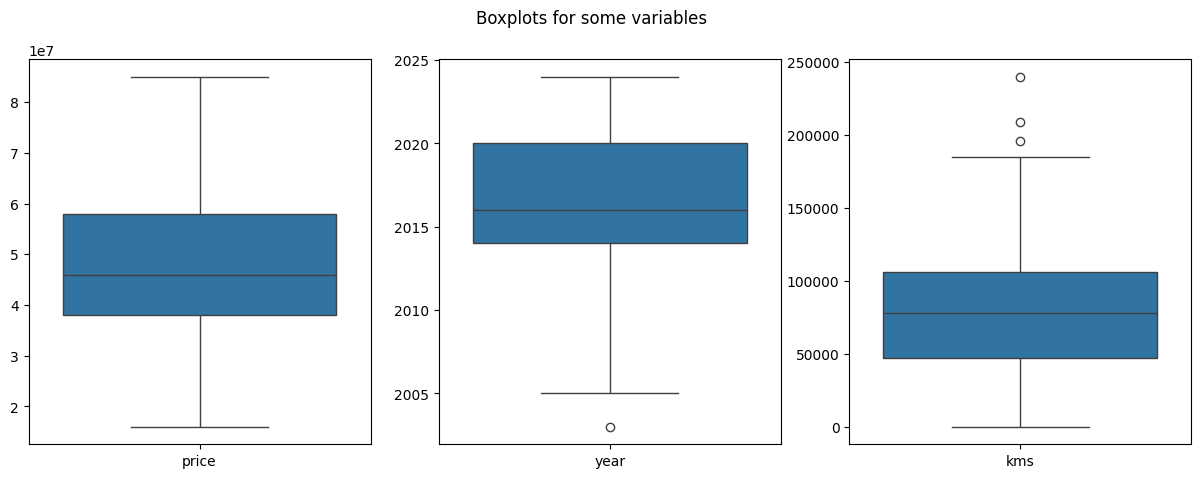

In [ ]:
# Z score to eliminate outliers of 'year' and 'kms'
from scipy import stats

#find absolute value of z-score for each observation of 'kms'
z2 = np.abs(stats.zscore(datacc['kms']))

#only keep rows in dataframe with all z-scores less than absolute value of 3
toremove = datacc.kms[(z2>3)].index
datacc = datacc.drop(toremove)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Boxplots for some variables')
sns.boxplot(data=datacc[['price']], ax=ax1)
sns.boxplot(data=datacc[['year']], ax=ax2)
sns.boxplot(data=datacc[['kms']], ax=ax3)

Text(0.5, 1.0, '$kms$')

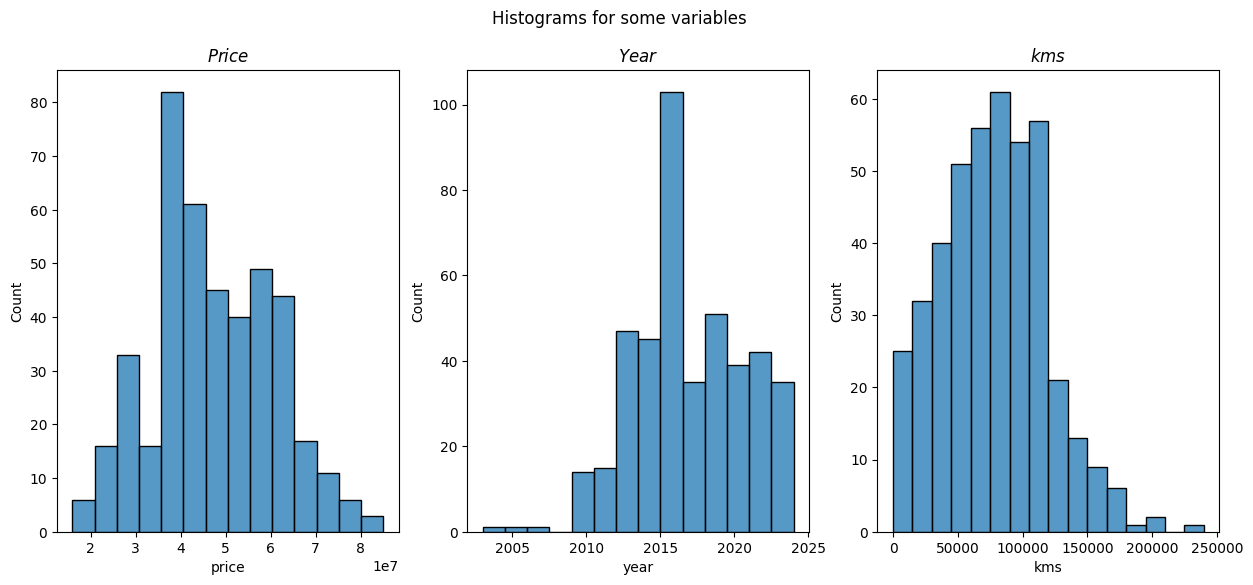

In [ ]:
# Histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle('Histograms for some variables')
sns.histplot(datacc['price'], ax=ax1)
ax1.set_title('$Price$')
sns.histplot(datacc['year'], ax=ax2)
ax2.set_title('$Year$')
sns.histplot(datacc['kms'], ax=ax3)
ax3.set_title('$kms$')

### EDA (Exploratory Data Analysis)

#### Correlations

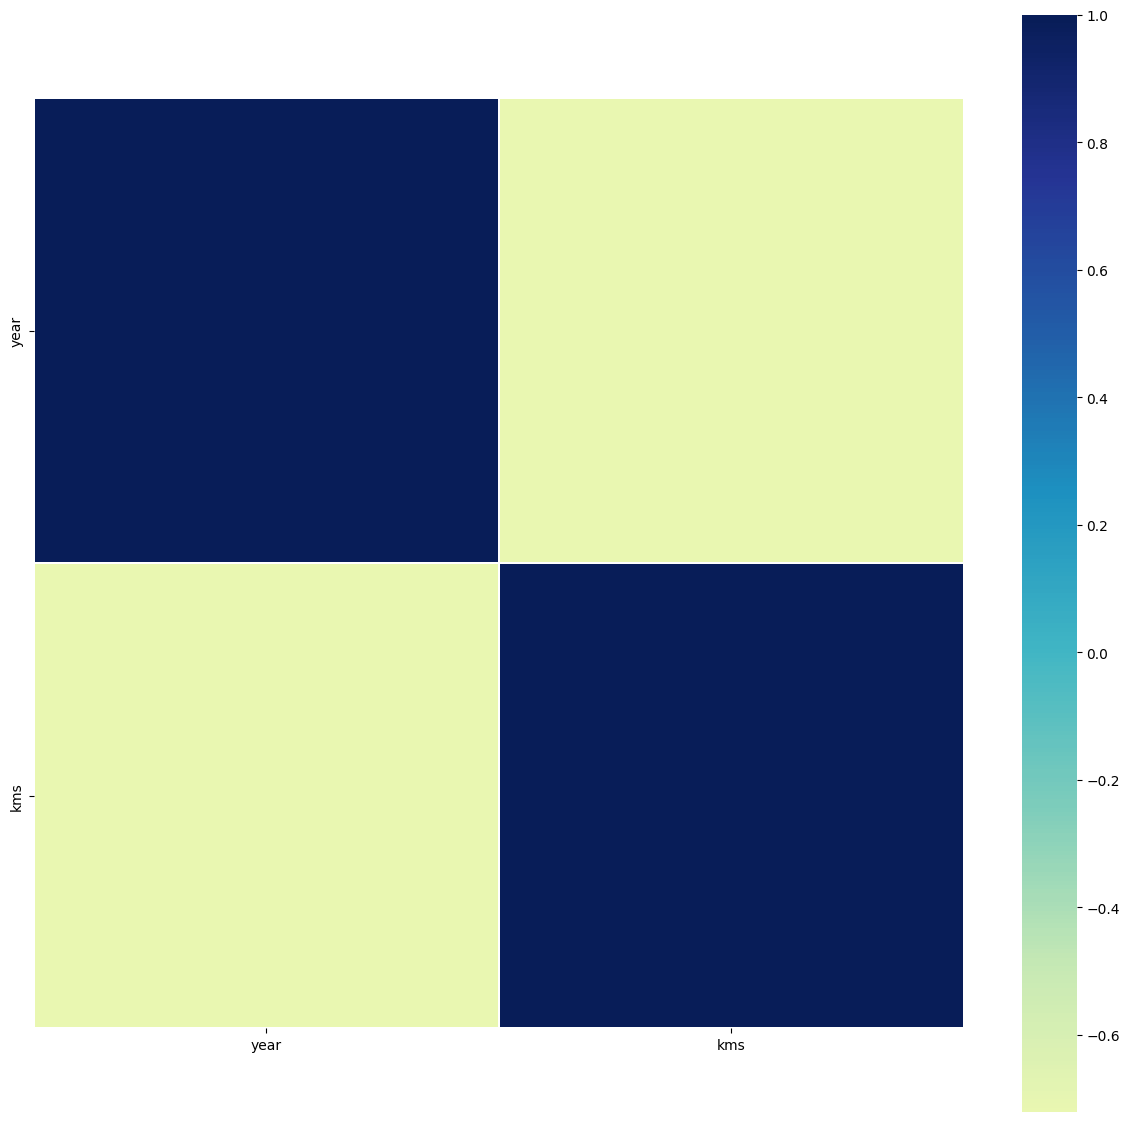

In [ ]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.2, annot=False, cbar_kws={"shrink": .95}
                )
    plt.show();

correlation_heatmap(X[['year', 'kms']])

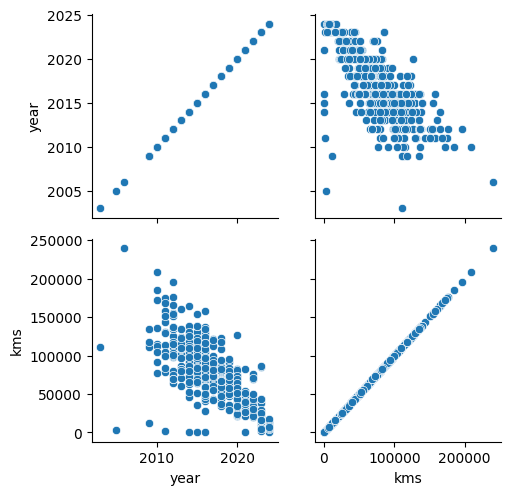

In [ ]:
g = sns.PairGrid(X[['year', 'kms']])
g.map(sns.scatterplot)

## Modeling: machine learning

### Libraries

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.metrics import mean_absolute_error as MAE
import pickle

### Data partitioning


In [ ]:
#Separar las variables de x y y
X = datacc.copy()
X = X.drop(['price'], axis=1)
print(X.shape)

Y = pd.DataFrame()
Y = datacc['price']
print(Y.shape)

(429, 4)
(429,)


In [ ]:
# Data set normalization and partitioning
sc = StandardScaler()
Xsc = sc.fit(X)
Xt = Xsc.transform(X)
Xt.shape

(429, 4)

In [ ]:
X_train, X_test, y_train, y_test = split(Xt,Y, # Editar
                                         test_size=0.20,
                                         random_state=42)

### Multivariate lineal regression

In [ ]:
# Define model and prediction
ols = LinearRegression()
model1 = ols.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [ ]:
# accuracy check
rmse = MSE(y_test, y_pred1, squared=False)
mae = MAE(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 5398404.87
MAE: 3804682.89
R2: 0.83


### Light GBM
https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/   
https://www.datatechnotes.com/2022/03/lightgbm-regression-example-in-python.html  

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
# Hyperparameters
params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'metric': {'l2','l1'},
    'header' : 'true',
    'verbose': 0
}

# laoding data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# fitting the model
model2 = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval)
# Pred
y_pred2 = model2.predict(X_test)

In [ ]:
# accuracy check
rmse = MSE(y_test, y_pred2, squared=False)
mae = MAE(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 5248942.99
MAE: 3993839.59
R2: 0.84


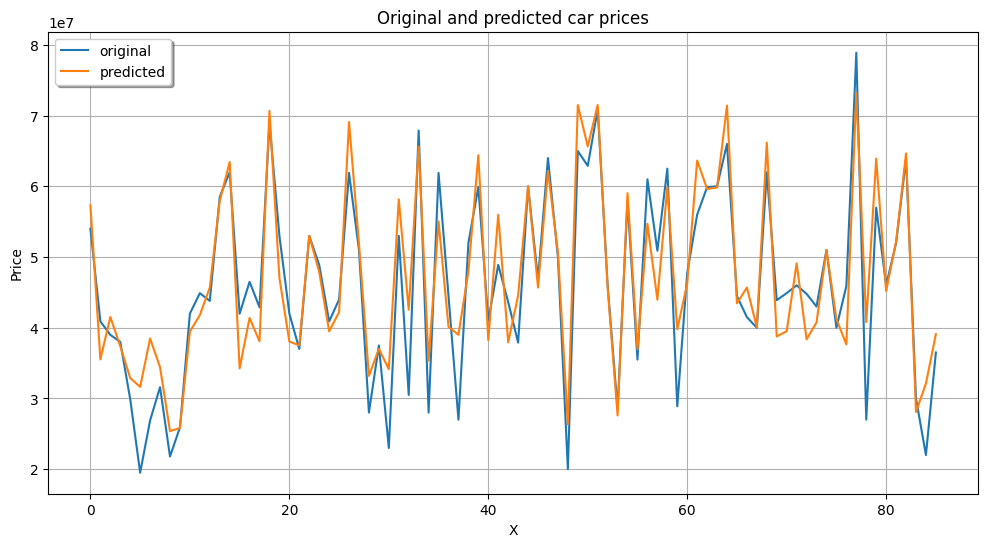

In [ ]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred2, label="predicted")
plt.title("Original and predicted car prices")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

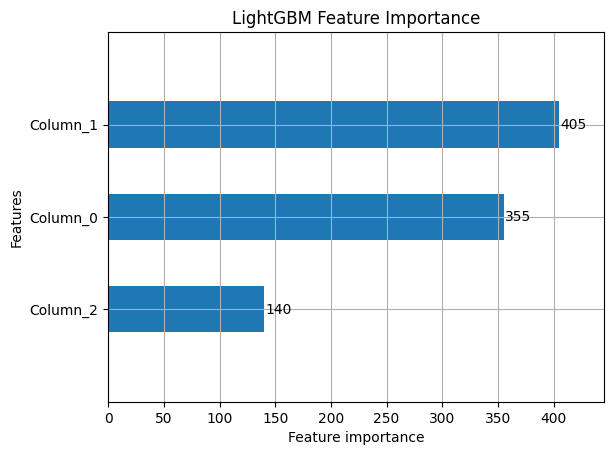

In [ ]:
# plotting feature importance
ax = lgb.plot_importance(model2, height=.5, title="LightGBM Feature Importance")


<Axes: >

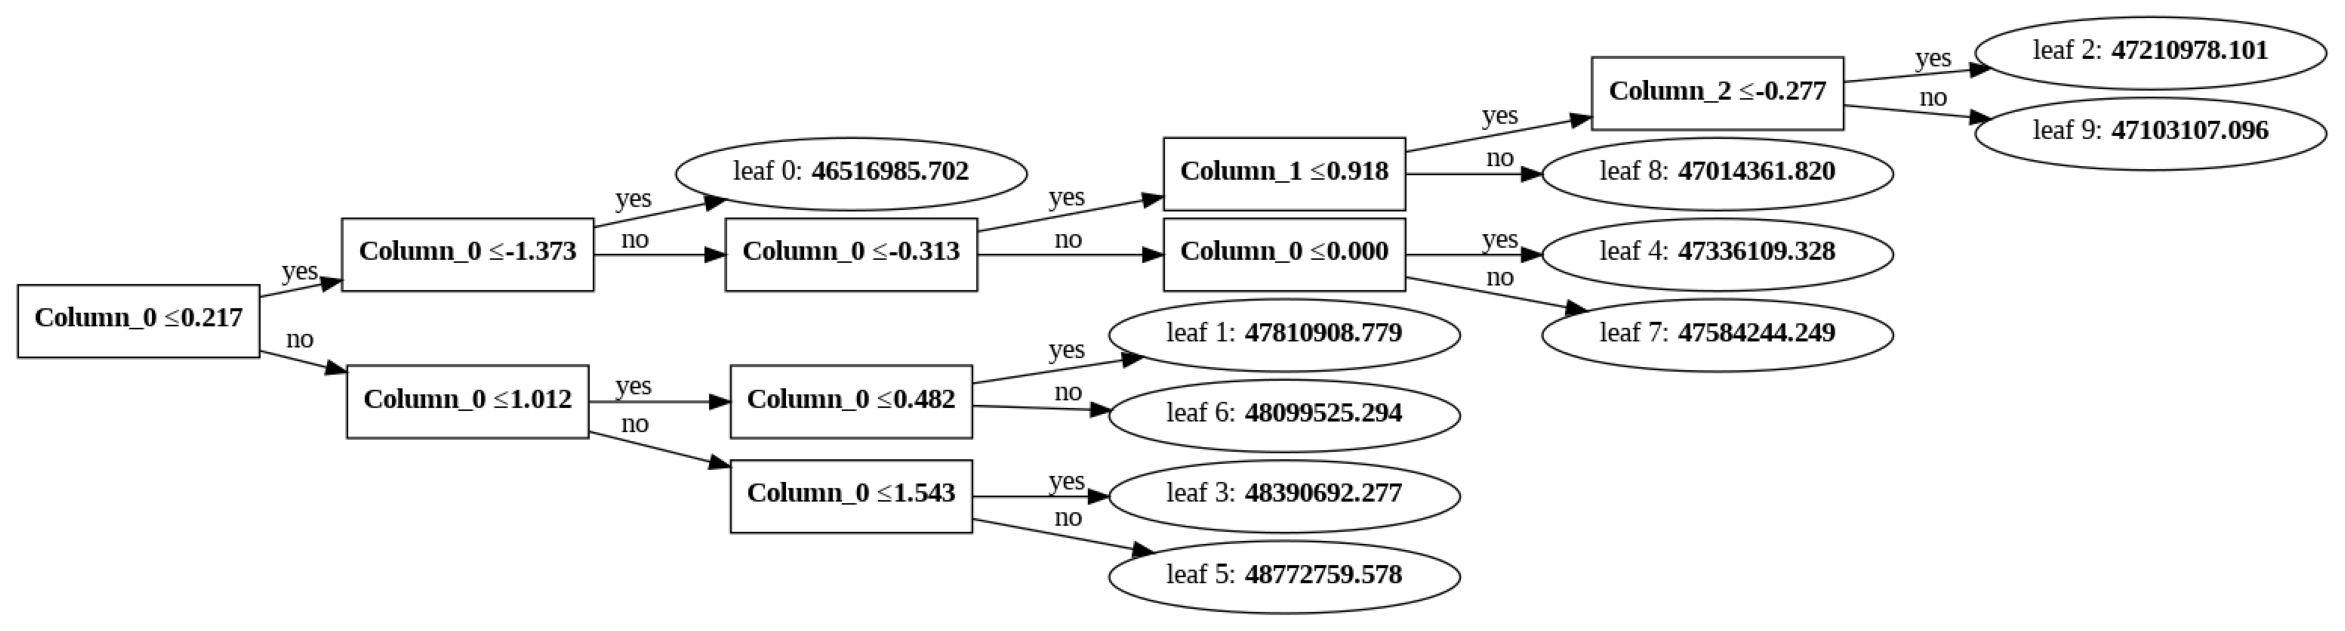

In [ ]:
lgb.plot_tree(model2,figsize=(30,40))

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [ ]:
# accuracy check
rmse = MSE(y_test, y_pred3, squared=False)
mae = MAE(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 5281649.73
MAE: 3895764.37
R2: 0.84


**Save the model**

In [ ]:
with open('model3.pkl', 'wb') as f:
  pickle.dump(model3, f)

### Xgboost regressor
https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb
from sklearn.metrics import classification_report

In [ ]:
#Define model
model4 = xgb.XGBRegressor(objective ='reg:squarederror',
                          booster='gbtree',
                          colsample_bytree = 1,
                          importance_type='gain',
                          learning_rate = 0.2,
                          max_depth = 5,
                          alpha = 5,
                          n_estimators = 200,
                          seed=123)

In [ ]:
#Training
model4.fit(X_train, y_train)#,
#         eval_set=[(X_train, y_train), (X_test, y_test)], \
#         eval_metric='mlogloss', verbose=False)

XGBRegressor(alpha=5, base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
#K-fold cross validation
scores = cross_val_score(model4, X_train, y_train, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.77


In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model4, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.76


In [ ]:
# Pred
y_pred4 = model4.predict(X_test)

In [ ]:
# accuracy check
rmse = MSE(y_test, y_pred4, squared=False)
mae = MAE(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 5453336.32
MAE: 4023237.93
R2: 0.83


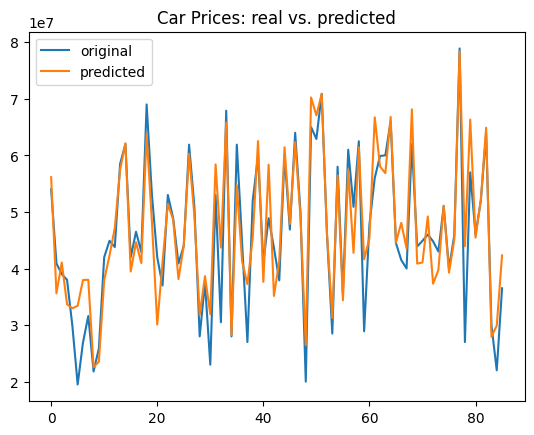

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred4, label="predicted")
plt.title("Car Prices: real vs. predicted")
plt.legend()
plt.show()